<a href="https://colab.research.google.com/github/sisomimoctrl/asset-allocation/blob/main/all_weather_kr_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bt yfinance quantstats

In [2]:
import bt
import yfinance as yf
import pandas as pd
import quantstats as qs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
tickers = ['spy', 'efa', 'eem', 'dbc', 'gld', 'edv', 'ltpz', 'lqd', 'emlc']
df = yf.download(tickers, end='2022-4-30')['Adj Close']

df.info()

[*********************100%***********************]  9 of 9 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7367 entries, 1993-01-29 to 2022-04-29
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DBC     4087 non-null   float64
 1   EDV     3590 non-null   float64
 2   EEM     4796 non-null   float64
 3   EFA     5202 non-null   float64
 4   EMLC    2964 non-null   float64
 5   GLD     4392 non-null   float64
 6   LQD     4974 non-null   float64
 7   LTPZ    3184 non-null   float64
 8   SPY     7367 non-null   float64
dtypes: float64(9)
memory usage: 575.5 KB


In [4]:
for c in df.columns:
    print(c, df[c].first_valid_index(), ',', df[c].last_valid_index())

DBC 2006-02-06 00:00:00 , 2022-04-29 00:00:00
EDV 2008-01-29 00:00:00 , 2022-04-29 00:00:00
EEM 2003-04-14 00:00:00 , 2022-04-29 00:00:00
EFA 2001-08-27 00:00:00 , 2022-04-29 00:00:00
EMLC 2010-07-23 00:00:00 , 2022-04-29 00:00:00
GLD 2004-11-18 00:00:00 , 2022-04-29 00:00:00
LQD 2002-07-30 00:00:00 , 2022-04-29 00:00:00
LTPZ 2009-09-08 00:00:00 , 2022-04-29 00:00:00
SPY 1993-01-29 00:00:00 , 2022-04-29 00:00:00


In [5]:
start = '2011-1-1'
end = '2022-4-30'

data = df[start:].copy()

In [6]:
print(data.corr())
print(data.resample('M').last().corr())

           DBC       EDV       EEM       EFA      EMLC       GLD       LQD  \
DBC   1.000000 -0.674257 -0.128316 -0.431060  0.587093  0.332777 -0.612388   
EDV  -0.674257  1.000000  0.556888  0.698202 -0.226710  0.386050  0.948696   
EEM  -0.128316  0.556888  1.000000  0.869767  0.303763  0.485851  0.740488   
EFA  -0.431060  0.698202  0.869767  1.000000 -0.051480  0.198919  0.872189   
EMLC  0.587093 -0.226710  0.303763 -0.051480  1.000000  0.410737 -0.132923   
GLD   0.332777  0.386050  0.485851  0.198919  0.410737  1.000000  0.366568   
LQD  -0.612388  0.948696  0.740488  0.872189 -0.132923  0.366568  1.000000   
LTPZ -0.391763  0.920753  0.741121  0.786740 -0.027100  0.600797  0.940808   
SPY  -0.467965  0.824259  0.823833  0.952240 -0.162007  0.352026  0.940939   

          LTPZ       SPY  
DBC  -0.391763 -0.467965  
EDV   0.920753  0.824259  
EEM   0.741121  0.823833  
EFA   0.786740  0.952240  
EMLC -0.027100 -0.162007  
GLD   0.600797  0.352026  
LQD   0.940808  0.940939  
LTP

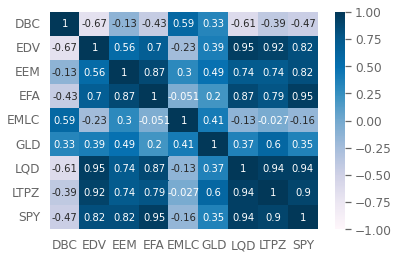

In [7]:
sns.heatmap(data=data.corr(), annot=True, vmin=-1, vmax=1, cmap=plt.cm.PuBu)

In [8]:
def long_only_ew(name, data, tickers, initial_capital=100000000.0):
    s = bt.Strategy(
        name, 
        [bt.algos.RunOnce(),
         bt.algos.SelectThese(tickers),
         bt.algos.WeighEqually(),
         bt.algos.Rebalance()])
    t = bt.Backtest(s, data, initial_capital=initial_capital)
    return t 

def strategy_all_weather(name, data, tickers, weights, initial_capital=100000000.0):
    s = bt.Strategy(        
        name, 
        [bt.algos.RunYearly(
            run_on_first_date=True, 
            run_on_end_of_period=True, 
            run_on_last_date=False),
         bt.algos.SelectThese(tickers),
         bt.algos.WeighSpecified(**weights),
         bt.algos.PrintDate(),
         bt.algos.PrintTempData(),
         bt.algos.Rebalance()])
    t = bt.Backtest(s, data, initial_capital=initial_capital)
    return t

weights = { 'SPY':0.12, 'EFA':0.12, 'EEM':0.12, 'DBC':0.07, 'GLD':0.07,
           'EDV':0.18, 'LTPZ':0.18, 'LQD':0.07, 'EMLC':0.07 }
bt_spy = long_only_ew('SPY', data, ['SPY'])
bt_all_weather_kr = strategy_all_weather('All-Weather-KR', 
    data = data, 
    tickers = ['SPY', 'EFA', 'EEM', 'DBC', 'GLD',
               'EDV', 'LTPZ', 'LQD', 'EMLC'], 
    weights=weights)

res = bt.run(bt_all_weather_kr, bt_spy)

2011-01-03 00:00:00
{'selected': ['SPY', 'EFA', 'EEM', 'DBC', 'GLD', 'EDV', 'LTPZ', 'LQD', 'EMLC'], 'weights': {'SPY': 0.12, 'EFA': 0.12, 'EEM': 0.12, 'DBC': 0.07, 'GLD': 0.07, 'EDV': 0.18, 'LTPZ': 0.18, 'LQD': 0.07, 'EMLC': 0.07}}
2011-12-30 00:00:00
{'selected': ['SPY', 'EFA', 'EEM', 'DBC', 'GLD', 'EDV', 'LTPZ', 'LQD', 'EMLC'], 'weights': {'SPY': 0.12, 'EFA': 0.12, 'EEM': 0.12, 'DBC': 0.07, 'GLD': 0.07, 'EDV': 0.18, 'LTPZ': 0.18, 'LQD': 0.07, 'EMLC': 0.07}}
2012-12-31 00:00:00
{'selected': ['SPY', 'EFA', 'EEM', 'DBC', 'GLD', 'EDV', 'LTPZ', 'LQD', 'EMLC'], 'weights': {'SPY': 0.12, 'EFA': 0.12, 'EEM': 0.12, 'DBC': 0.07, 'GLD': 0.07, 'EDV': 0.18, 'LTPZ': 0.18, 'LQD': 0.07, 'EMLC': 0.07}}
2013-12-31 00:00:00
{'selected': ['SPY', 'EFA', 'EEM', 'DBC', 'GLD', 'EDV', 'LTPZ', 'LQD', 'EMLC'], 'weights': {'SPY': 0.12, 'EFA': 0.12, 'EEM': 0.12, 'DBC': 0.07, 'GLD': 0.07, 'EDV': 0.18, 'LTPZ': 0.18, 'LQD': 0.07, 'EMLC': 0.07}}
2014-12-31 00:00:00
{'selected': ['SPY', 'EFA', 'EEM', 'DBC', 'GLD', 'ED

In [9]:
res.display()

Stat                 All-Weather-KR    SPY
-------------------  ----------------  ----------
Start                2011-01-02        2011-01-02
End                  2022-04-29        2022-04-29
Risk-free rate       0.00%             0.00%

Total Return         83.87%            302.22%
Daily Sharpe         0.67              0.81
Daily Sortino        1.06              1.23
CAGR                 5.53%             13.08%
Max Drawdown         -18.96%           -33.72%
Calmar Ratio         0.29              0.39

MTD                  -6.44%            -8.78%
3m                   -7.77%            -6.49%
6m                   -10.39%           -9.69%
YTD                  -11.09%           -12.99%
1Y                   -5.27%            -0.63%
3Y (ann.)            6.52%             13.77%
5Y (ann.)            5.95%             13.52%
10Y (ann.)           4.52%             13.55%
Since Incep. (ann.)  5.53%             13.08%

Daily Sharpe         0.67              0.81
Daily Sortino        1.06   

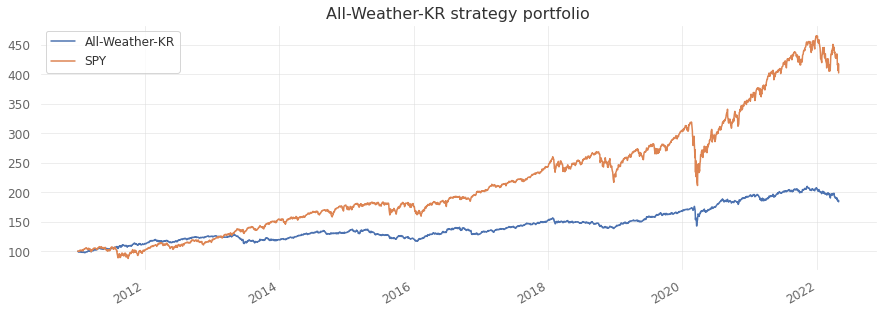

In [10]:
res.plot()
plt.title('All-Weather-KR strategy portfolio', fontsize=16)
plt.legend(ncol=1)
plt.show()

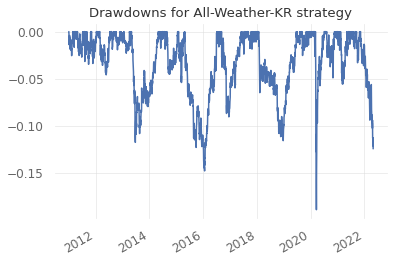

In [11]:
res.backtests['All-Weather-KR'].stats.drawdown[:].plot()
plt.title('Drawdowns for All-Weather-KR strategy')
plt.show()

In [12]:
res.backtests['All-Weather-KR'].stats.drawdown_details.sort_values(by='drawdown', ascending=True).head(5)

,Start,End,Length,drawdown
102,2020-03-09 00:00:00,2020-07-02 00:00:00,115,-0.189563
57,2015-02-03 00:00:00,2016-07-08 00:00:00,521,-0.148264
131,2021-11-10 00:00:00,2022-04-29 00:00:00,170,-0.12471
39,2013-05-03 00:00:00,2014-05-02 00:00:00,364,-0.117862
81,2018-01-29 00:00:00,2019-06-20 00:00:00,507,-0.116051


In [13]:
res.backtests['All-Weather-KR'].stats.drawdown_details.sort_values(by='Length', ascending=False).head(5)

,Start,End,Length,drawdown
57,2015-02-03 00:00:00,2016-07-08 00:00:00,521,-0.148264
81,2018-01-29 00:00:00,2019-06-20 00:00:00,507,-0.116051
39,2013-05-03 00:00:00,2014-05-02 00:00:00,364,-0.117862
63,2016-09-08 00:00:00,2017-06-01 00:00:00,266,-0.090714
131,2021-11-10 00:00:00,2022-04-29 00:00:00,170,-0.12471


In [14]:
res.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2011  -1.79   2.61   1.09   4     -0.23  -1.54   2.97   1.9   -1.06   3.65   0.21   0.11   12.36
  2012   4.55   1.44  -1.97   1.2   -2.04   1.97   2.84   0.67   1.08  -0.15   1.11   0.49   11.57
  2013  -0.17  -0.65   0.37   2.45  -5.16  -4.58   1.81  -1.47   2.42   2.34  -1.31  -0.12   -4.36
  2014   0.51   2.74   0.88   1.76   2.39   1.3   -0.42   2.87  -4.46   1.54   0.83  -0.33    9.8
  2015   3.95  -1.08  -1.14   0.82  -2.14  -2.9   -0.13  -3.45  -1.87   3.36  -1.61  -2.04   -8.19
  2016   0.2    1.82   4.64   1.46  -1.16   4.75   2.53  -0.33   0.44  -2.57  -4.5    0.63    7.77
  2017   2.36   1.88   0.47   1.28   1.65   0.05   1.76   2.15  -0.47   1.08   1.07   2.5    16.93
  2018   1.86  -3.75   1.04  -0.72  -0.12  -0.77   0.56  -0.44  -0.76  -5.2    0.85  -0.16   -7.57
  2019   4.